In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

In [2]:
iris = datasets.load_iris()

In [3]:
X = iris.data[:, :2]
y = (iris.target != 0) * 1

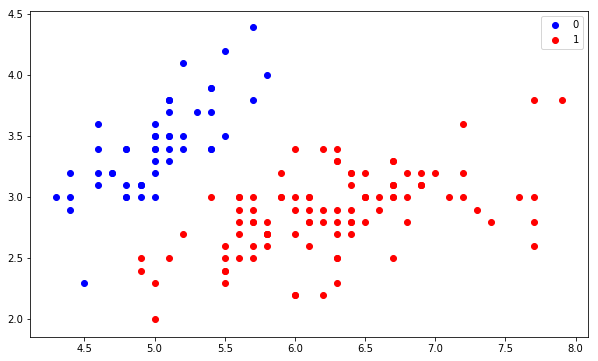

In [4]:
plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='b', label='0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='r', label='1')
plt.legend();

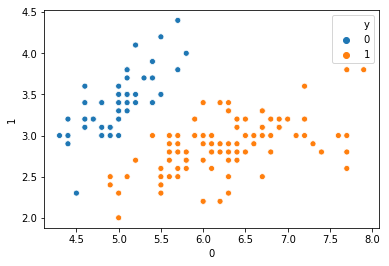

In [33]:
import seaborn as sns
import pandas as pd
df = pd.DataFrame(X)
df['y']=y
sns.scatterplot(x=0, y=1, data=df, hue='y')

In [259]:
class LogisticRegression:
    figs = []
    
    def __init__(self, lr=0.01, num_iter=100000, fit_intercept=True, verbose=False):
        self.lr = lr
        self.num_iter = num_iter
        self.fit_intercept = fit_intercept
        self.verbose = verbose
    
    def __add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)
    
    def graph_it(self, XX, y, c):        
#         plt.figure(figsize=(10, 6))
#         plt.scatter(X[:, y == 0, 0], X[0, y == 0, 1], color='b', label='0')
#         plt.scatter(X[:, y == 1, 0], X[0, y == 1, 1], color='r', label='1')
#         plt.legend()
        X = XX[:,1:]
        df = pd.DataFrame(X)
        df['y']=y
        sns.scatterplot(x=0, y=1, data=df, hue='y')
        
        x1_min, x1_max = X[:,0].min(), X[:,0].max(),
#         x2_min, x2_max = X[:,1].min(), X[:,1].max(),
        xt = np.linspace(x1_min, x1_max).reshape((-1,1))
        intercept = np.ones((xt.shape[0], 1))
        xt = np.concatenate((intercept, xt), axis=1)
        t = self.theta[0:-1]
        ys = xt.dot(t)/(-self.theta[-1])
        
        df = pd.DataFrame(xt[:,1])
        df['y'] = ys
        to_save = sns.lineplot(x=0, y='y', data=df)
        to_save.set(xlim=(4, 8.5))
        to_save.set(ylim=(1.5, 5))
        to_save.set(xlabel='Feature 1', ylabel='Feature 2')
        figure = to_save.get_figure()    
        f_name = ''.join(['output_', str(c), '.png'])
        self.figs.append(f_name)
        figure.savefig(f_name)

#         print(df)
    
#         xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
#         print(xx1.shape)
#         grid = np.c_[xx1.ravel(), xx2.ravel()]
#         probs = self.predict_prob(grid).reshape(xx1.shape)
#         plt.contour(xx1, xx2, probs, [0.5], linewidths=1, colors='black');
        plt.show()
    
    def __sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    def __loss(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    
    def fit(self, X, y):
        if self.fit_intercept:
            X = self.__add_intercept(X)
        
        # weights initialization
        self.theta = np.zeros(X.shape[1])
        
        fig, ax = plt.subplots()
        fig.set_tight_layout(True)

        for i in range(self.num_iter):
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            gradient = np.dot(X.T, (h - y)) / y.size
            self.theta -= self.lr * gradient
            self.lr *= 1.0
            print(self.lr)
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            loss = self.__loss(h, y)
            
            if(i % 1 == 0):
                self.graph_it(X, y, i)
            
            if(self.verbose ==True and i % 10000 == 0):
                print(f'loss: {loss} \t')
    
    def predict_prob(self, X):
        if self.fit_intercept:
            X = self.__add_intercept(X)
    
        return self.__sigmoid(np.dot(X, self.theta))
    
    def predict(self, X):
        return self.predict_prob(X).round()

In [260]:
model = LogisticRegression(lr=0.3, num_iter=100)

In [261]:
xt = np.linspace(0, 10).reshape((-1,1))
xt.shape

(50, 1)

0.3


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


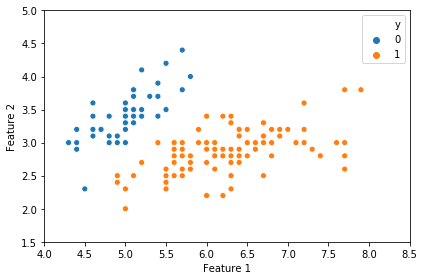

0.3


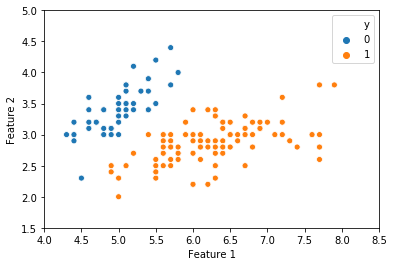

0.3


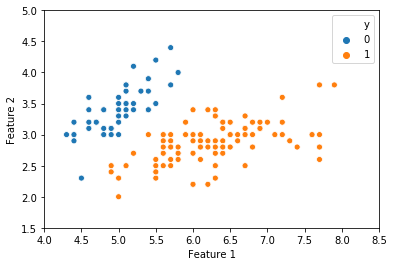

0.3


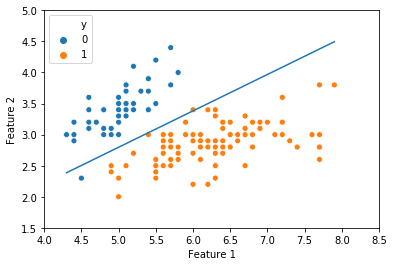

0.3


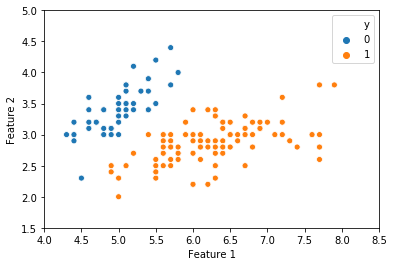

0.3


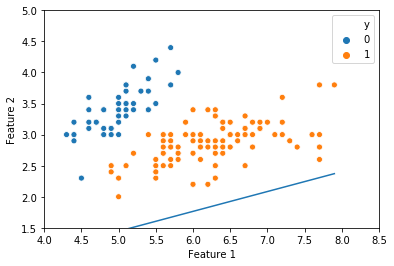

0.3


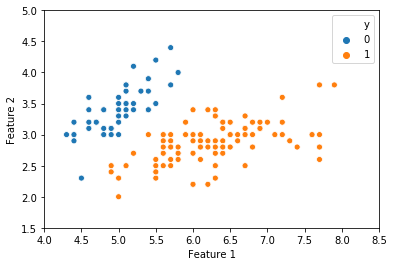

0.3


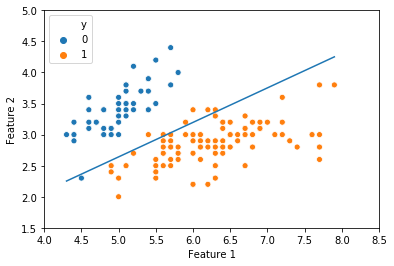

0.3


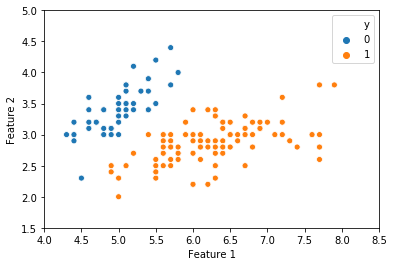

0.3


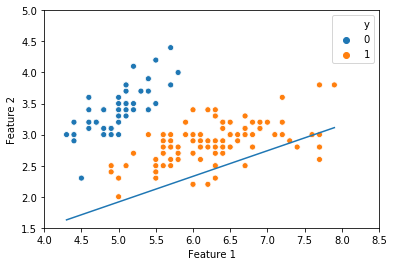

0.3


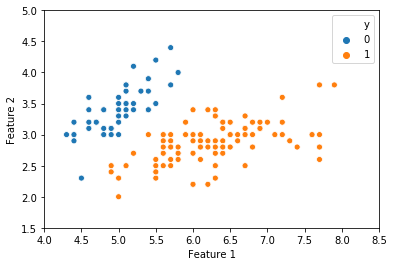

0.3


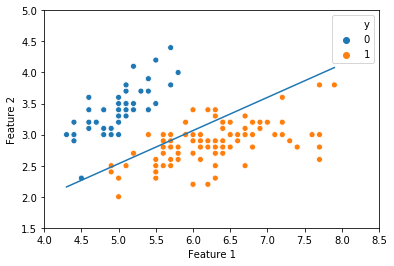

0.3


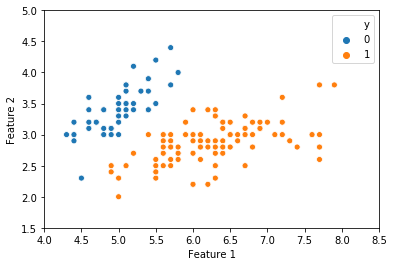

0.3


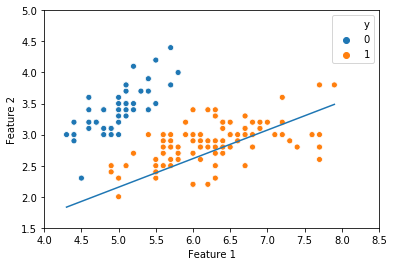

0.3


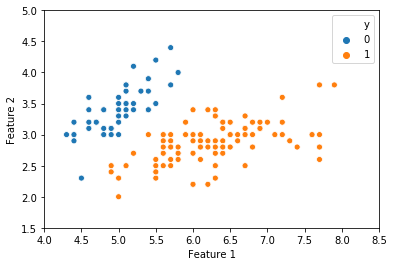

0.3


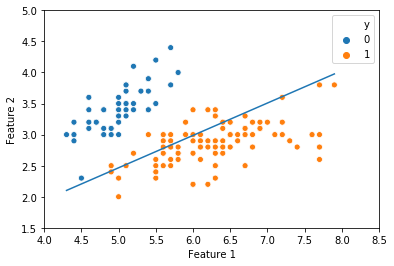

0.3


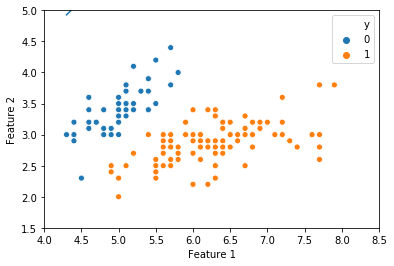

0.3


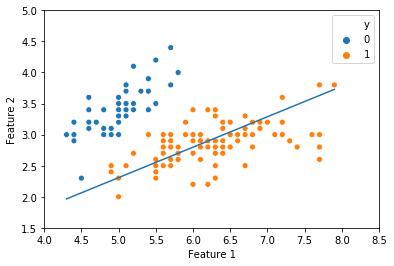

0.3


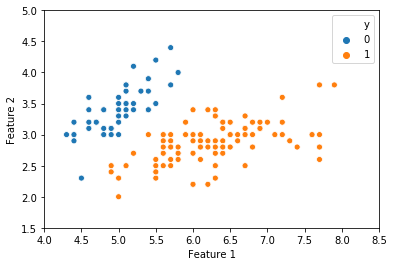

0.3


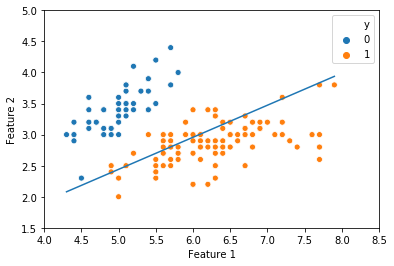

0.3


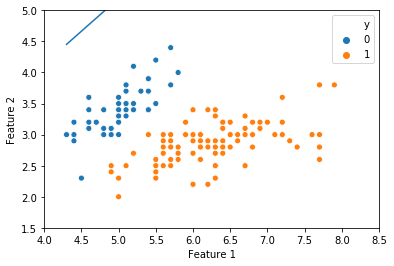

0.3


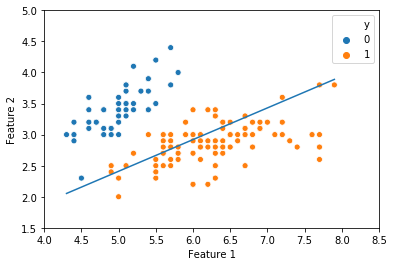

0.3


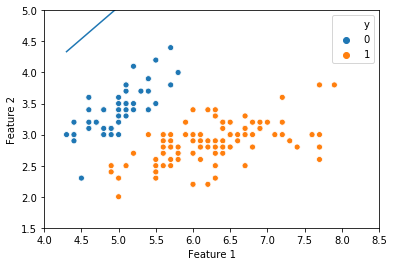

0.3


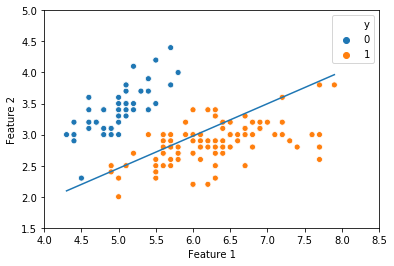

0.3


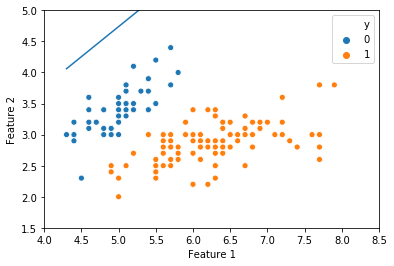

0.3


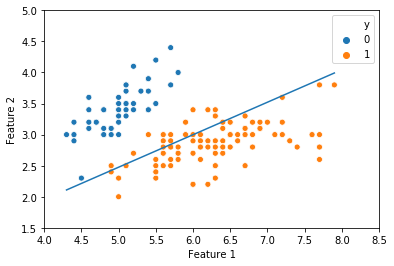

0.3


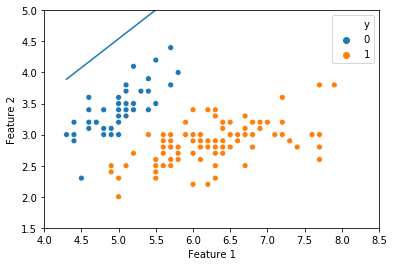

0.3


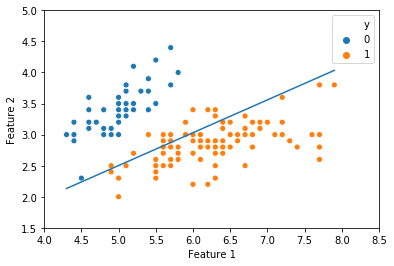

0.3


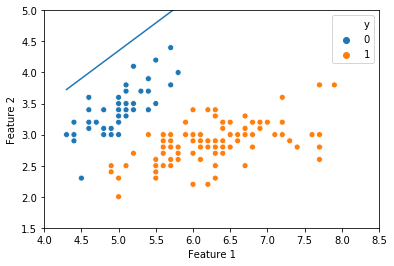

0.3


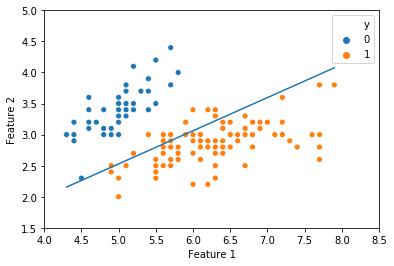

0.3


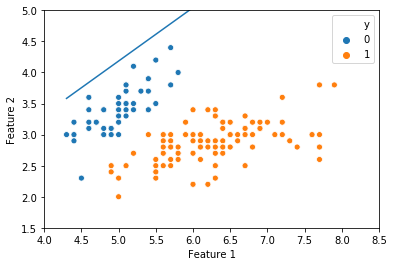

0.3


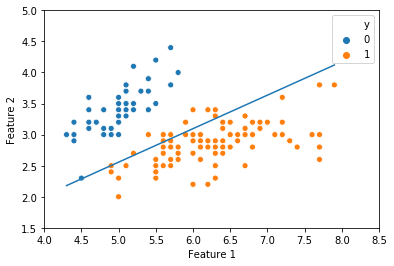

0.3


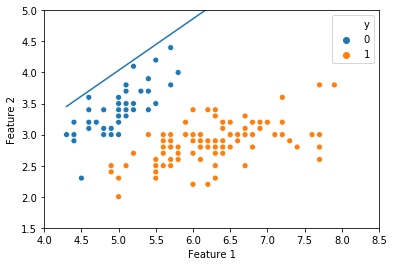

0.3


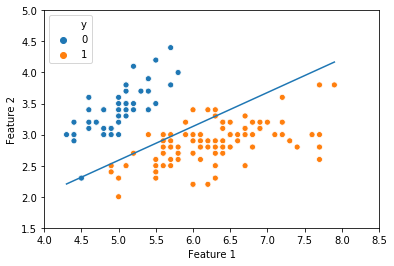

0.3


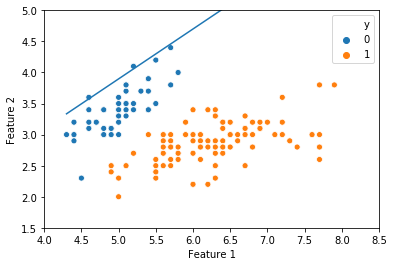

0.3


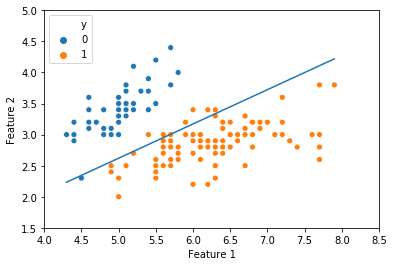

0.3


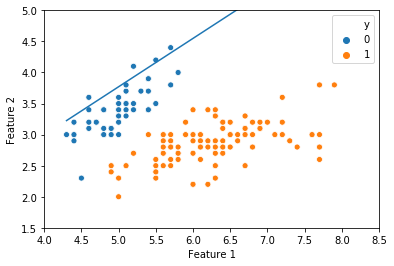

0.3


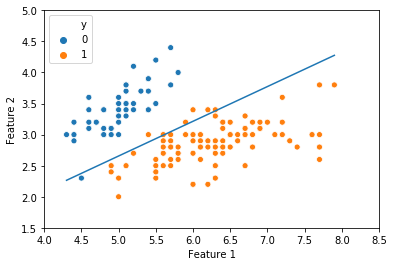

0.3


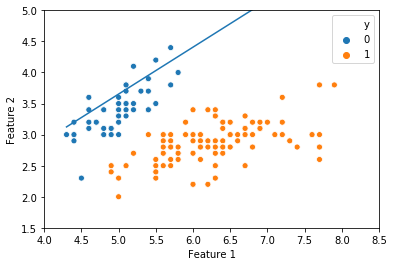

0.3


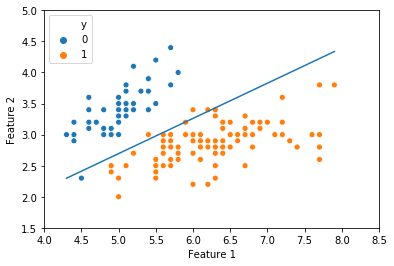

0.3


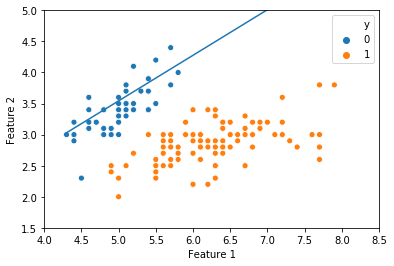

0.3


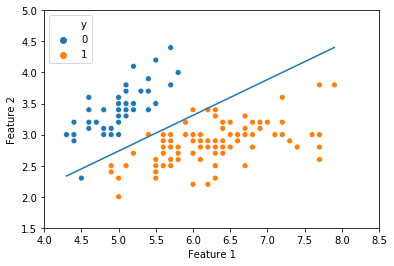

0.3


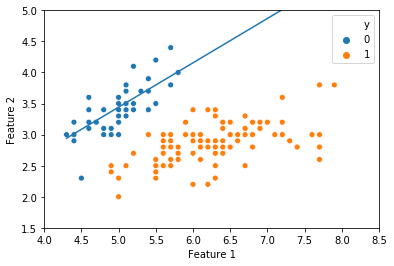

0.3


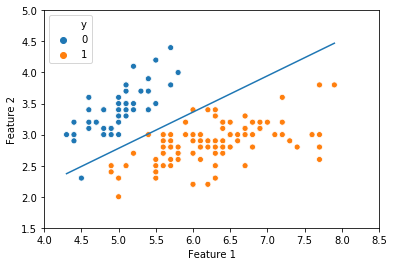

0.3


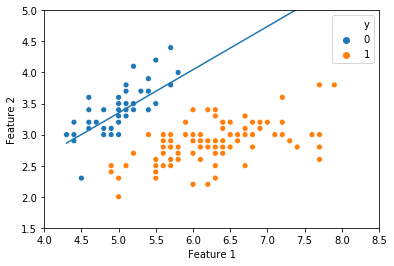

0.3


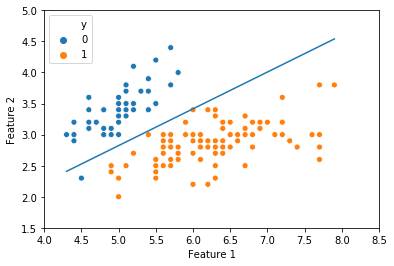

0.3


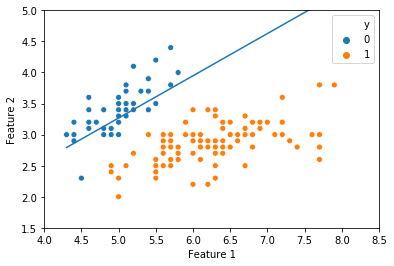

0.3


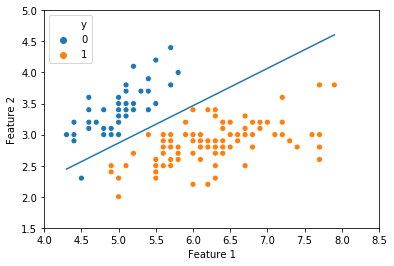

0.3


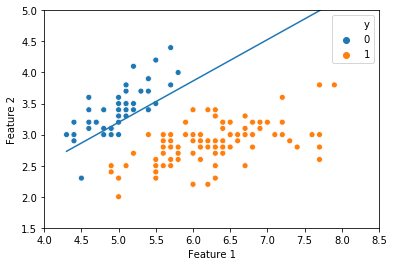

0.3


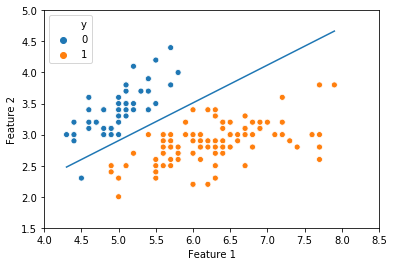

0.3


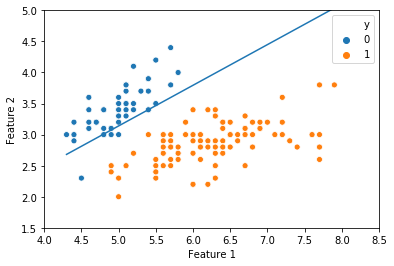

0.3


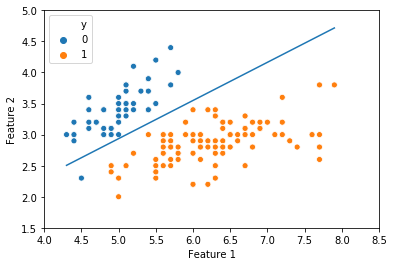

0.3


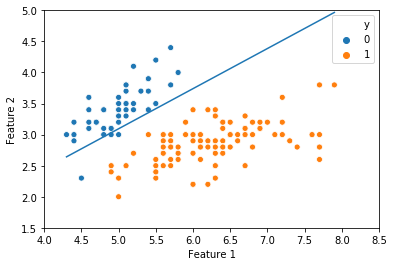

0.3


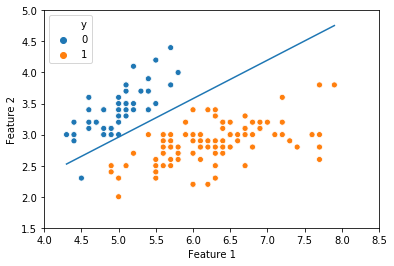

0.3


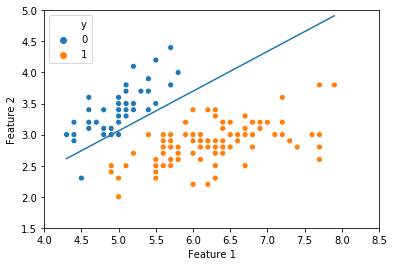

0.3


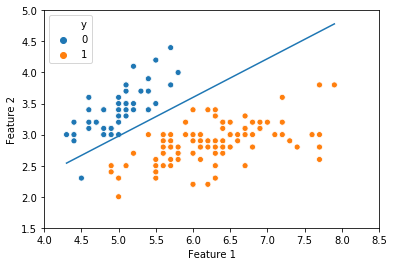

0.3


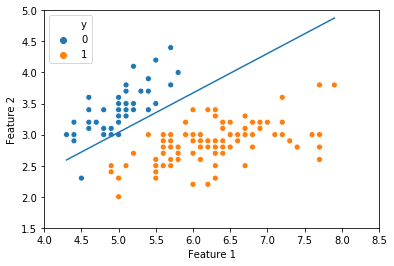

0.3


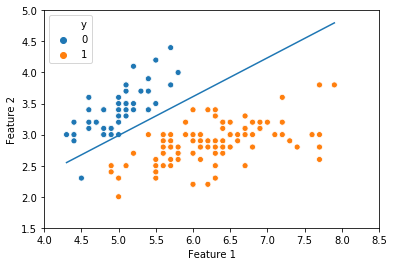

0.3


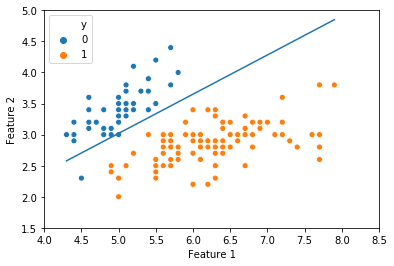

0.3


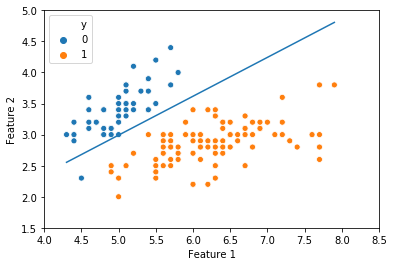

0.3


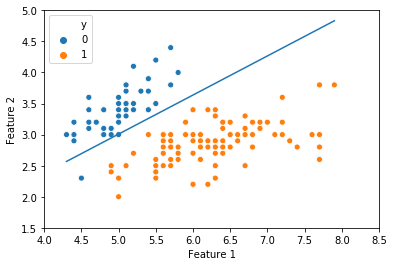

0.3


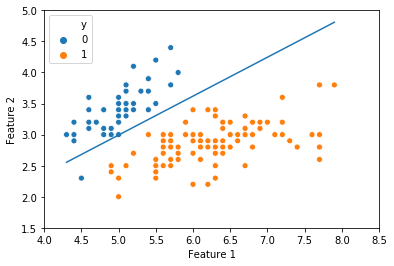

0.3


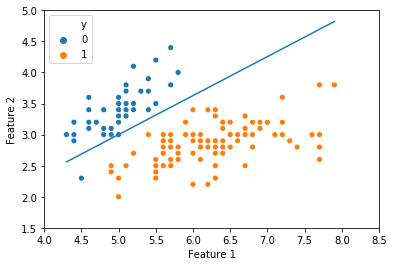

0.3


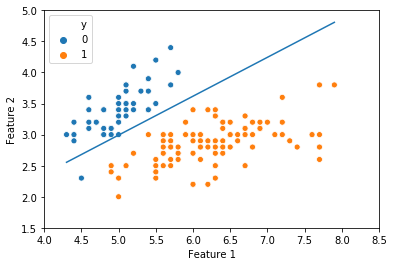

0.3


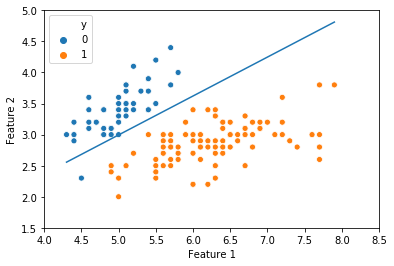

0.3


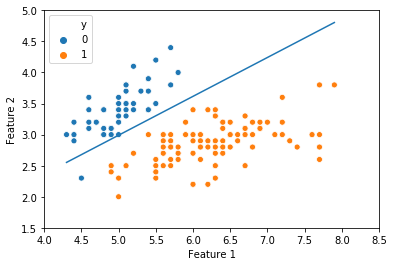

0.3


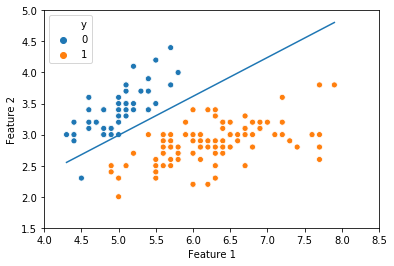

0.3


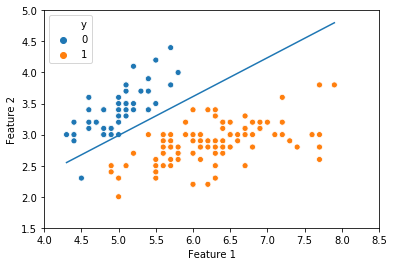

0.3


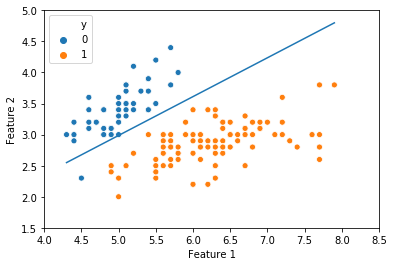

0.3


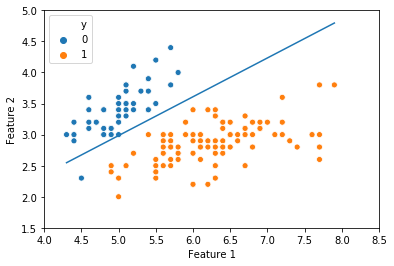

0.3


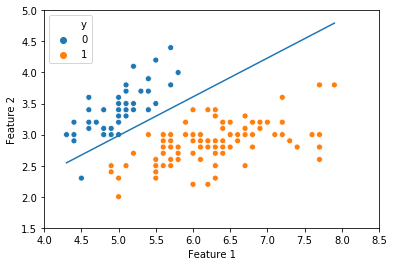

0.3


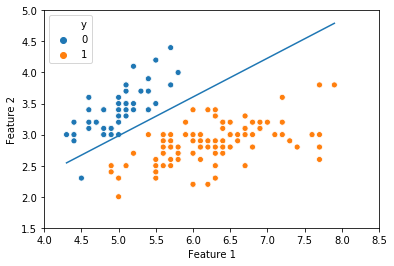

0.3


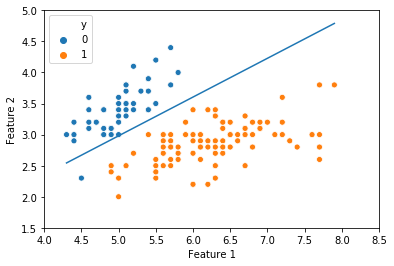

0.3


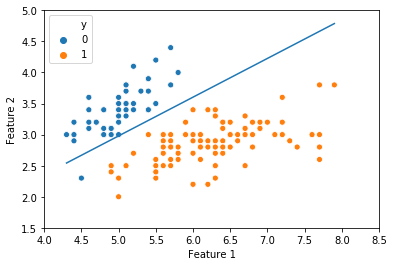

0.3


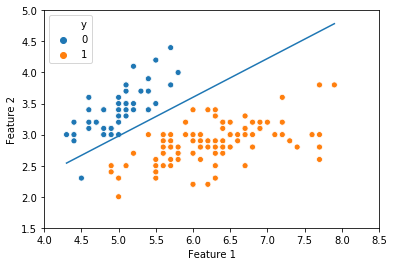

0.3


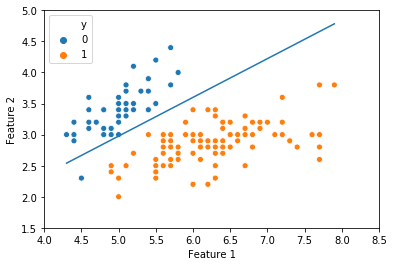

0.3


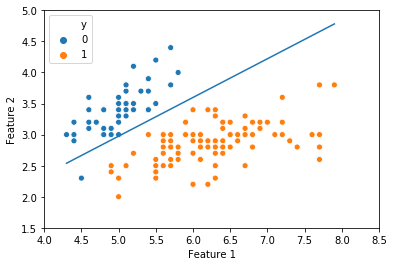

0.3


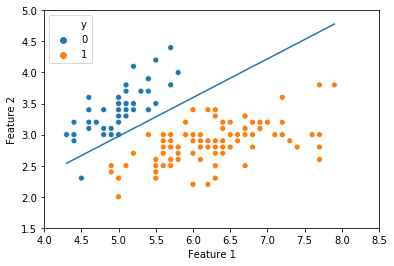

0.3


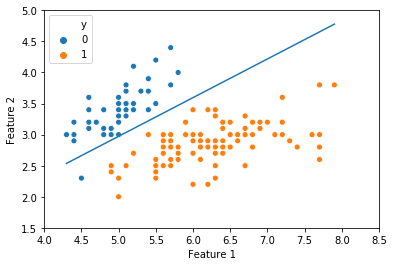

0.3


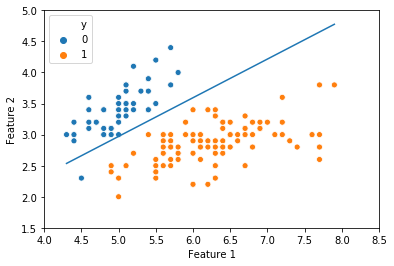

0.3


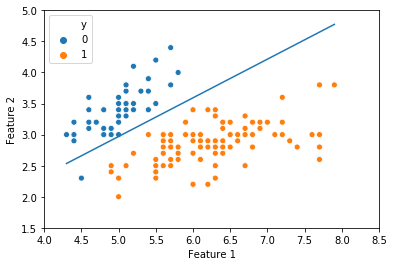

0.3


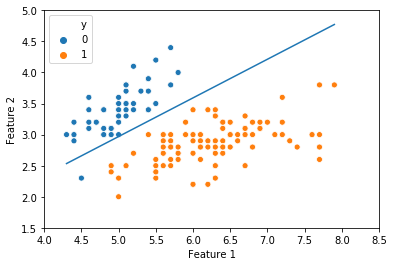

0.3


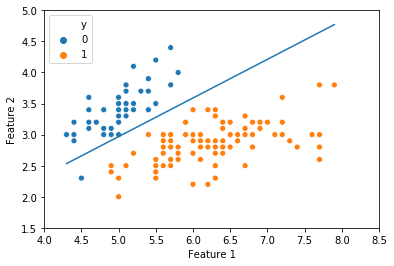

0.3


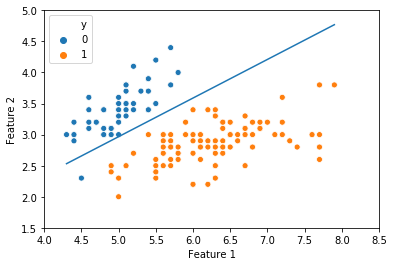

0.3


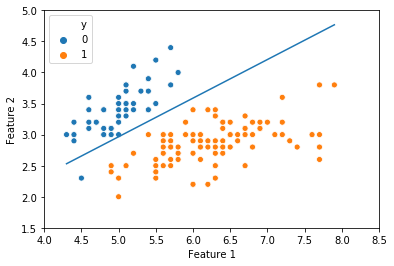

0.3


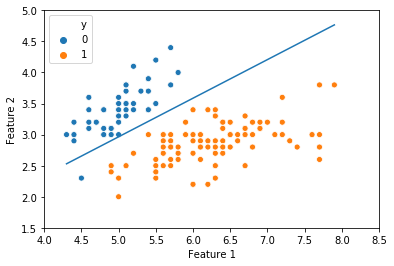

0.3


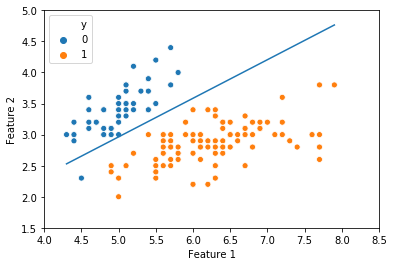

0.3


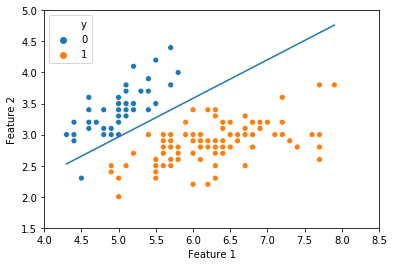

0.3


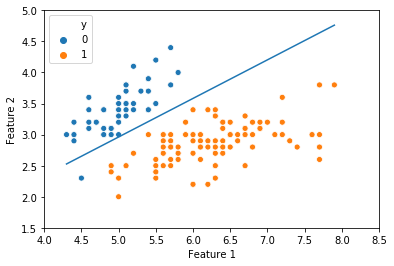

0.3


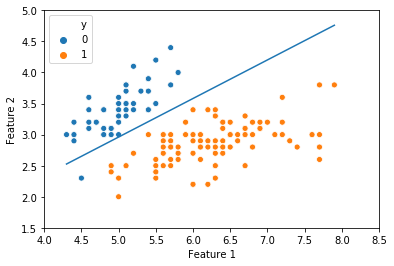

0.3


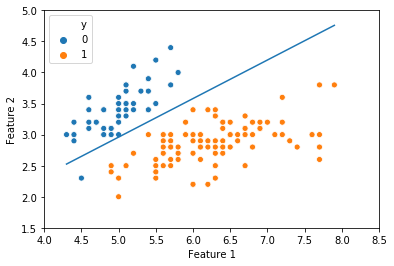

0.3


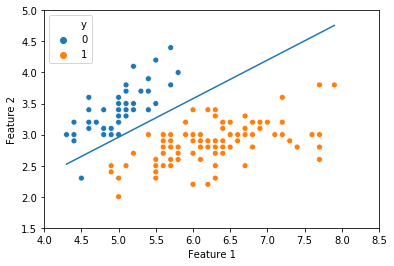

0.3


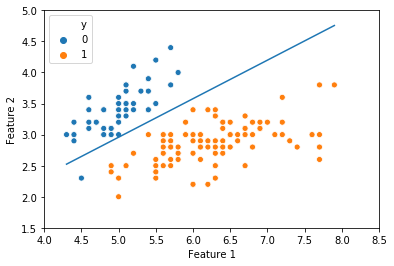

0.3


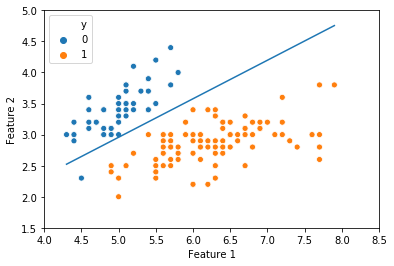

0.3


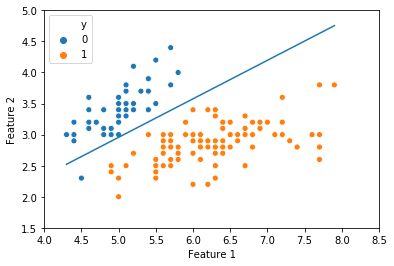

0.3


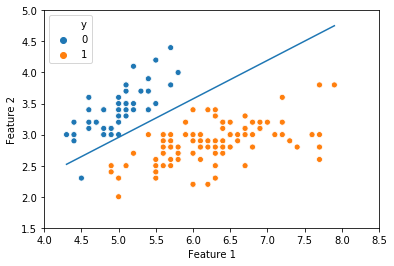

0.3


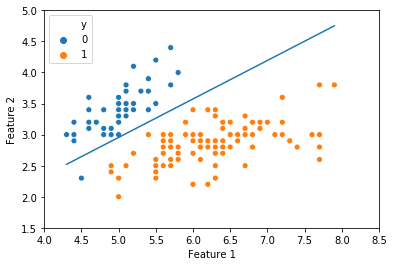

0.3


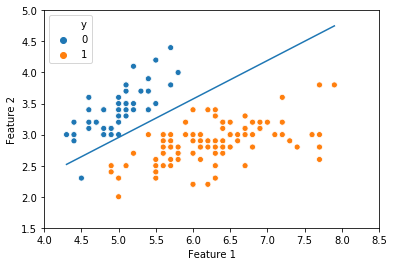

0.3


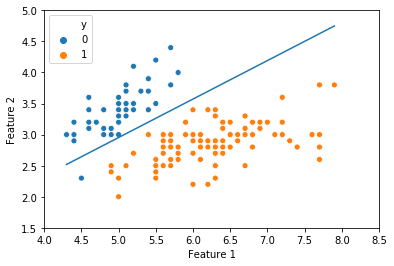

0.3


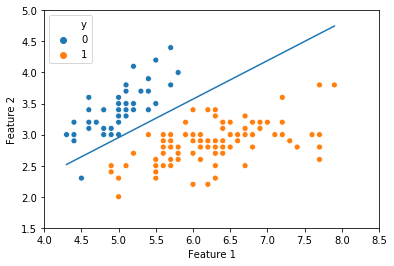

Wall time: 50.8 s


In [262]:
%time model.fit(X, y)

In [258]:
import imageio
images = []
for filename in model.figs:
    images.append(imageio.imread(filename))
imageio.mimsave('movie.gif', images)

TypeError: update() missing 1 required positional argument: 'props'

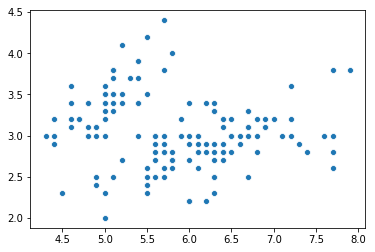

In [200]:
g = sns.scatterplot(x=X[:,0],y=X[:,1])


In [147]:
preds = model.predict(X)
(preds == y).mean()

0.9933333333333333

In [9]:
model.theta

array([-25.96818124,  12.56179068, -13.44549335])

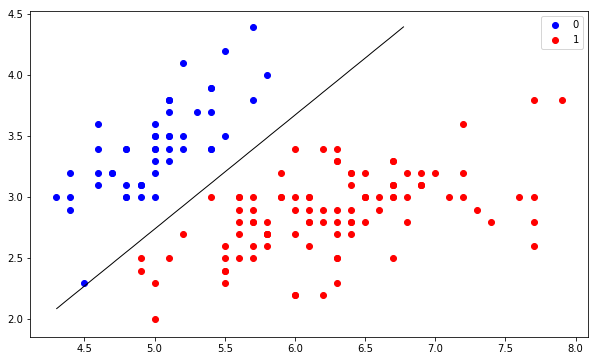

In [10]:
plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='b', label='0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='r', label='1')
plt.legend()
x1_min, x1_max = X[:,0].min(), X[:,0].max(),
x2_min, x2_max = X[:,1].min(), X[:,1].max(),
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
grid = np.c_[xx1.ravel(), xx2.ravel()]
probs = model.predict_prob(grid).reshape(xx1.shape)
plt.contour(xx1, xx2, probs, [0.5], linewidths=1, colors='black');

In [11]:
import seaborn as sns
sns.scatterplot

In [ ]:
!conda install seaborn

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
model = LogisticRegression(C=1e20)

In [22]:
%time model.fit(X, y)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 855 µs


LogisticRegression(C=1e+20, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [23]:
preds = model.predict(X)
(preds == y).mean()

1.0

In [24]:
model.intercept_, model.coef_

(array([-80.62725491]), array([[ 31.61988897, -28.31500665]]))